In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and insights on the dataset

In [27]:
dfm=pd.read_csv('D1.csv')
dfm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
dfm.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
dfm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
dfm.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## Understanding on the features and basic renaming

In [29]:
dfm.rename(columns={'Chance of Admit ': 'Admission Decision'}, inplace=True)
dfm['Admission Decision'] = dfm['Admission Decision'].apply(lambda x: 1 if x > 0.75 else 0)
dfm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Decision
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [30]:
corr=dfm.corr()
corr.shape

(9, 9)

<AxesSubplot: >

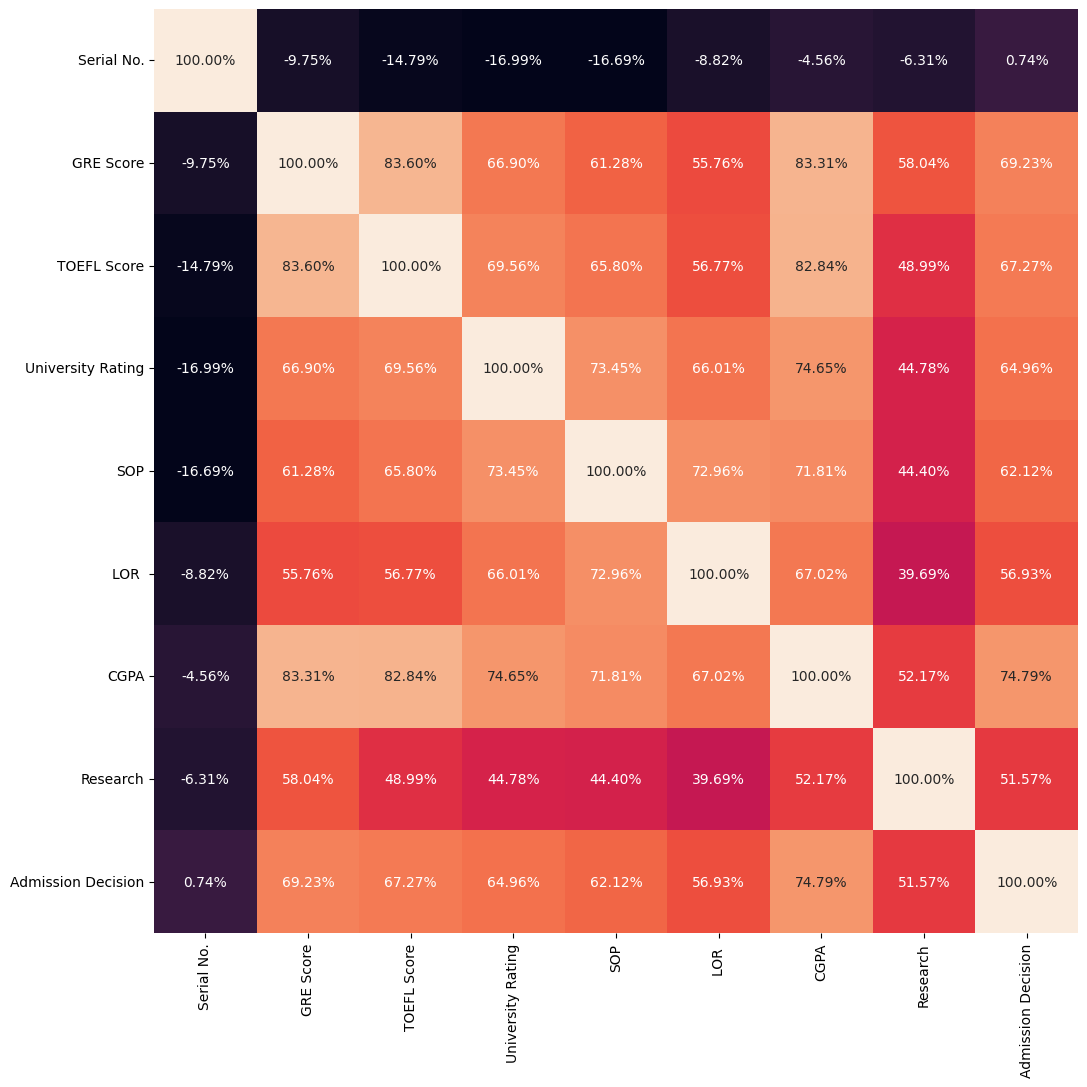

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=False, square= True, fmt='.2%', annot=True)

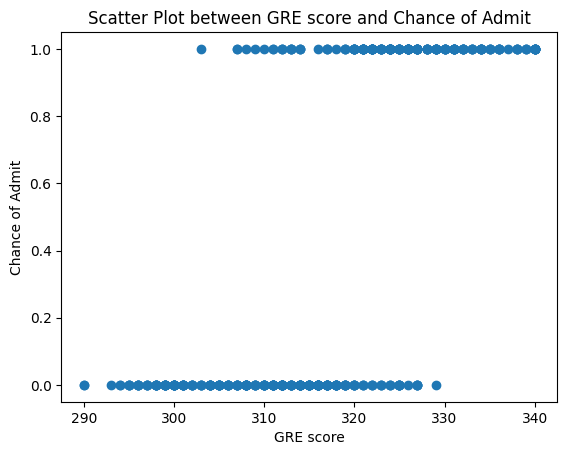

In [10]:
plt.scatter(dfm['GRE Score'], dfm['Admission Decision'])
plt.xlabel('GRE score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between GRE score and Chance of Admit')
plt.show()

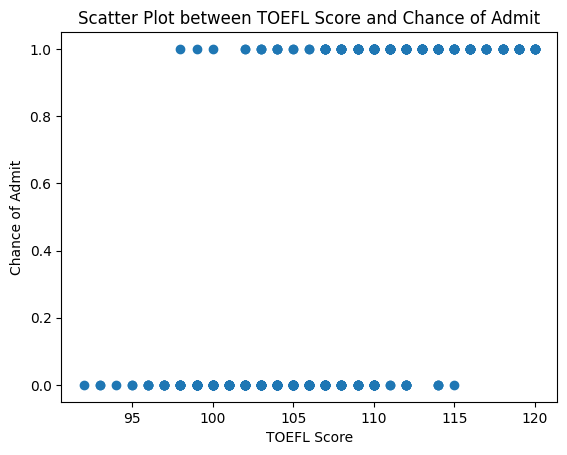

In [11]:
plt.scatter(dfm['TOEFL Score'], dfm['Admission Decision'])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between TOEFL Score and Chance of Admit')
plt.show()

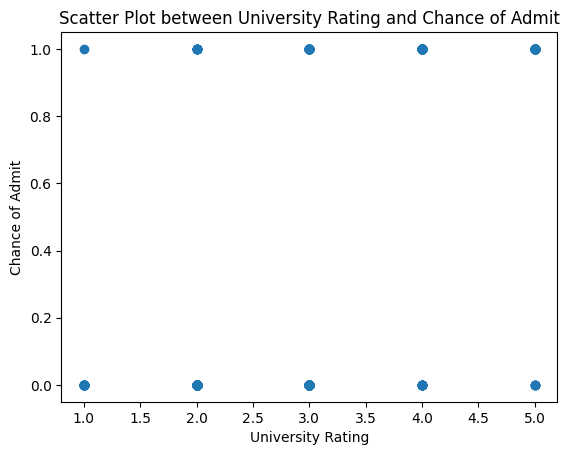

In [12]:
plt.scatter(dfm['University Rating'], dfm['Admission Decision'])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between University Rating and Chance of Admit')
plt.show()

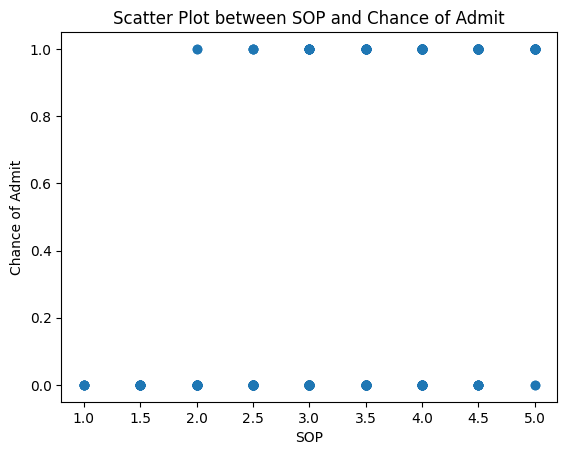

In [13]:
plt.scatter(dfm['SOP'], dfm['Admission Decision'])
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between SOP and Chance of Admit')
plt.show()

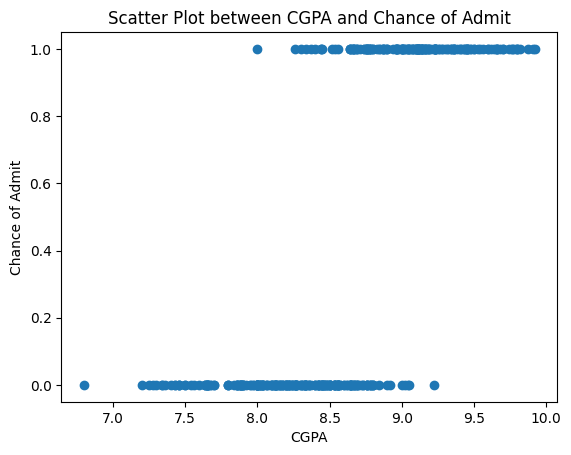

In [14]:
plt.scatter(dfm['CGPA'], dfm['Admission Decision'])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between CGPA and Chance of Admit')
plt.show()

## Splitting of the data

In [15]:
dfm.shape

(400, 9)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfm.drop(['Admission Decision'], axis = 1), dfm['Admission Decision'], test_size=0.2)


In [33]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (320, 8)
X_test shape: (80, 8)
y_train shape: (320,)
y_test shape: (80,)


In [34]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Gradient Boost Classfier 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.878125
Test Score: 0.8875


In [21]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [43]:
from sklearn.metrics import accuracy_score
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test, gradient_booster.predict(X_test)))

GBC accuracy is 0.89


In [44]:
from sklearn.metrics import classification_report

pred=gradient_booster.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        47
           1       0.93      0.79      0.85        33

    accuracy                           0.89        80
   macro avg       0.90      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



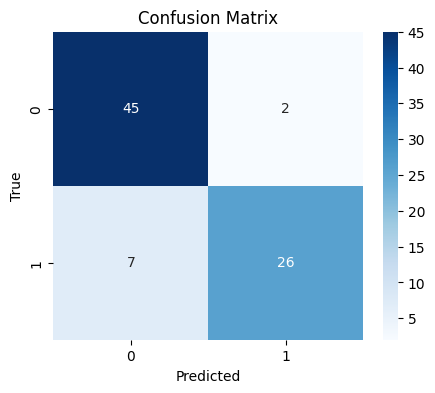

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = gradient_booster.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

In [ ]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

In [ ]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 2}
Train Score: 0.8718750000000001
Test Score: 0.875


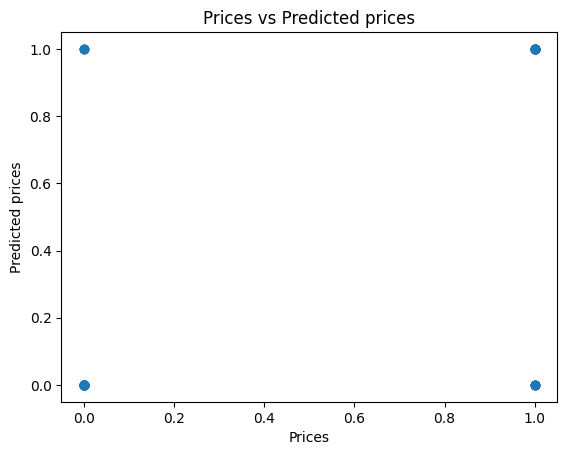

In [ ]:
y_pred = gb_cv.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## SVC

In [37]:
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.590625
Test Score: 0.6875


In [ ]:
# grid = {
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf","sigmoid"],
#     'degree' : [1,3,5,7],
#     'gamma' : [0.01,1]
# }

# svm  = SVC ()
# svm_cv = GridSearchCV(svm, grid, cv = 5)
# svm_cv.fit(X_train,y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)
# print("Test Score:",svm_cv.score(X_test,y_test))

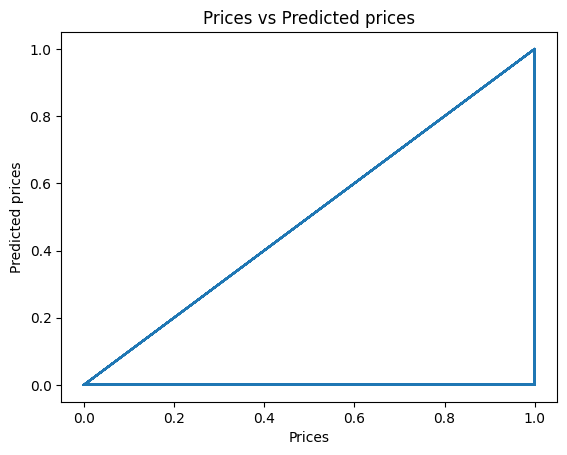

In [ ]:
y_pred=svc.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
pred=svc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        49
           1       1.00      0.23      0.37        31

    accuracy                           0.70        80
   macro avg       0.84      0.61      0.59        80
weighted avg       0.80      0.70      0.63        80



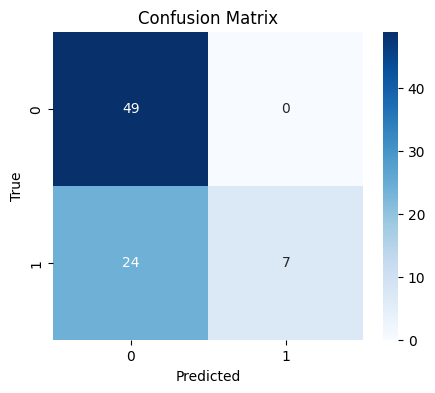

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.875
Test Score: 0.8875


In [ ]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

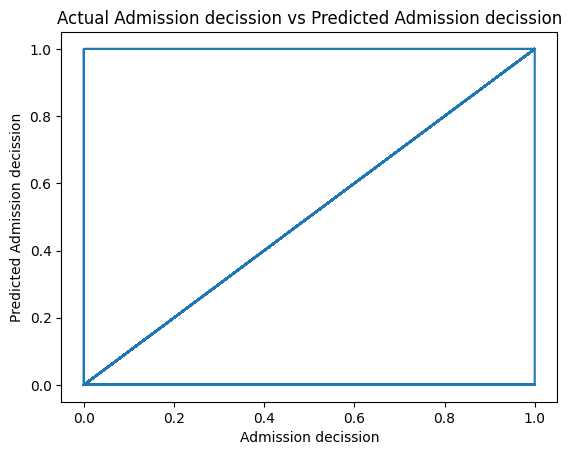

In [ ]:
y_pred = classifier.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Admission decission")
plt.ylabel("Predicted Admission decission")
plt.title("Actual Admission decission vs Predicted Admission decission")
plt.show()

In [ ]:
pred=classifier.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        49
           1       0.91      0.68      0.78        31

    accuracy                           0.85        80
   macro avg       0.87      0.82      0.83        80
weighted avg       0.86      0.85      0.84        80



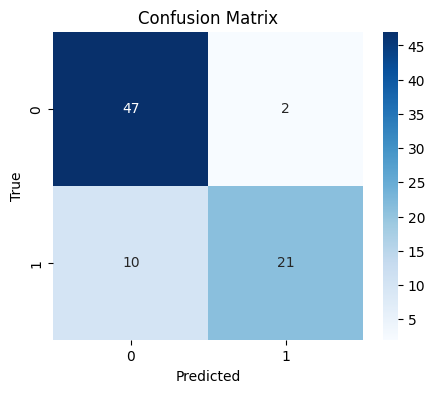

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Neural Networks

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f'Test accuracy: {test_acc * 100:.2f}%')

# Print training accuracy
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')

Epoch 1/50
8/8 [==============================] - 1s 43ms/step - loss: 0.6678 - accuracy: 0.5781 - val_loss: 0.5943 - val_accuracy: 0.7969
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.8281 - val_loss: 0.4823 - val_accuracy: 0.8594
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4425 - accuracy: 0.8672 - val_loss: 0.4070 - val_accuracy: 0.8750
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.8672 - val_loss: 0.3539 - val_accuracy: 0.8906
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3351 - accuracy: 0.8711 - val_loss: 0.3163 - val_accuracy: 0.8906
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.3044 - accuracy: 0.8750 - val_loss: 0.2908 - val_accuracy: 0.8750
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.2821 - accuracy: 0.8789 - val_loss: 0.2745 - val_accuracy: 0.8750
Epoch 8/50
8/8 [===============

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (Previous code)

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f'Test accuracy: {test_acc*100:.2f}%')
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')


3/3 [==============================] - 0s 4ms/step - loss: 0.2716 - accuracy: 0.8625
Test accuracy: 86.25%
Training accuracy: 94.92%


<Figure size 800x800 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your model as described in your code
# and you have X_test_scaled and y_test

# Make predictions on the test set
y_probs = model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Convert y_test to 1D array if it's not already
y_test = np.squeeze(y_test)

# Print the classification report
print(classification_report(y_test, y_pred))


3/3 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        49
           1       0.91      0.68      0.78        31

    accuracy                           0.85        80
   macro avg       0.87      0.82      0.83        80
weighted avg       0.86      0.85      0.84        80



3/3 [==============================] - 0s 4ms/step


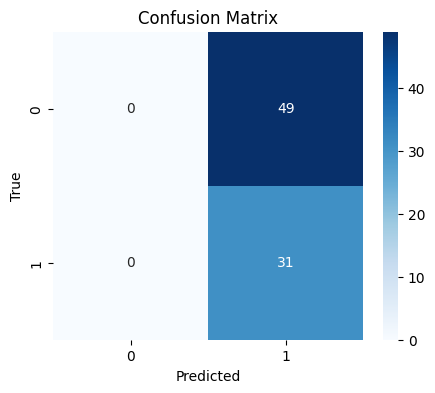

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## ROC curve

In [ ]:
# # auc roc curve

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # generate two class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# # split into train-test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# # train models
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # logistic regression
# model1 = LogisticRegression()
# # knn
# model2 = KNeighborsClassifier(n_neighbors=4)

# # fit model
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# # predict probabilities
# pred_prob1 = model1.predict_proba(X_test)
# pred_prob2 = model2.predict_proba(X_test)


# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# from sklearn.metrics import roc_auc_score

# # auc scores
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# print(auc_score1, auc_score2)

3/3 [==============================] - 0s 2ms/step


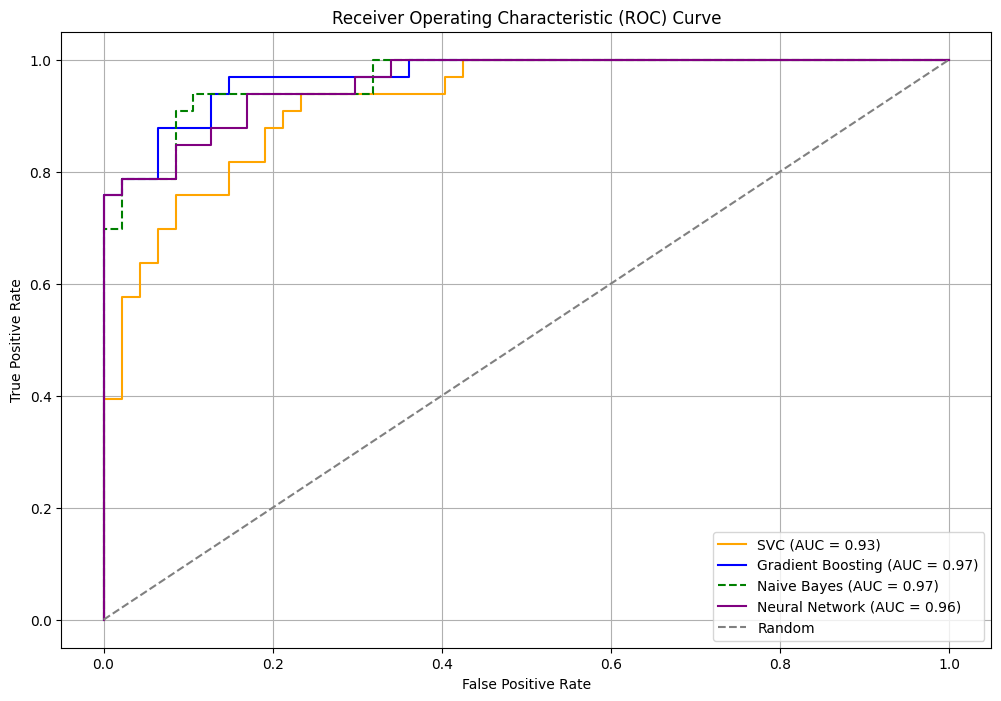

In [42]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained classifiers named svc, gradient_booster, and classifier
classifiers = [svc, gradient_booster, classifier]
labels = ['SVC', 'Gradient Boosting', 'Naive Bayes', 'Neaural Network']
colors = ['orange', 'blue', 'green', 'yellow']

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot ROC curve for each classifier
for classifier, label, color in zip(classifiers, labels, colors):
    # Assuming X_test and y_test are your test data
    if isinstance(classifier, SVC):
        y_scores = classifier.decision_function(X_test)
    else:
        y_scores = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with different line styles and colors
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color, linestyle='--' if label == 'Naive Bayes' else '-')

# Plot ROC curve for the neural network
y_probs = model.predict(X_test_scaled)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='purple', linestyle='-')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
